In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 회귀
- LinearRegression : 가장 기본적인 선형 회귀. 규제 함수가 없다.
- Ridge : LinearRegression에 규제함수 l2를 추가한것.
- Lasso : LinearRegression에 규제함수 l1을 추가한것.
- ElasticNet : Ridge와 Lasso의 조합
- SVM(SVR) : 서브벡터머신 방식으로 회귀를 수행한다.

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/boston.csv')
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [4]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

In [5]:
print(X)
print(y)

[[-0.63326028  0.12485095 -1.03628034 ... -1.07088823  0.41031054
  -0.92655695]
 [-0.60097475 -0.58885279 -0.25831126 ...  0.06047401  0.41031054
  -0.22972861]
 [-0.60100552 -0.58885279 -0.25831126 ...  0.06047401  0.31149419
  -1.08568842]
 ...
 [-0.56479774 -0.58885279 -0.56557636 ...  1.14658176  0.23574309
  -0.80930218]
 [-0.5854857  -0.58885279 -0.56557636 ...  1.14658176  0.22821654
  -0.63006989]
 [-0.58205565 -0.58885279 -0.56557636 ...  1.14658176  0.41031054
  -0.41901131]]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64


### 기본 모델을 통한 교차 검증

In [6]:
# LinearRegression
model1 = LinearRegression()
kfold1 = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(model1, X, y, scoring='r2', cv=kfold1)
print(f'평균 성능 수치 : {r1.mean()}')

평균 성능 수치 : 0.8509777564842589


In [7]:
# Ridge
model2 = Ridge()
kfold2 = KFold(n_splits=10, shuffle=True, random_state=1)
r2 = cross_val_score(model2, X, y, scoring='r2', cv=kfold2)
print(f'평균 성능 수치 : {r2.mean()}')

평균 성능 수치 : 0.8510047417482982


In [8]:
# Lasso
model3 = Lasso()
kfold3 = KFold(n_splits=10, shuffle=True, random_state=1)
r3 = cross_val_score(model3, X, y, scoring='r2', cv=kfold3)
print(f'평균 성능 수치 : {r3.mean()}')

평균 성능 수치 : 0.7967879509364957


In [9]:
# ElasticNet
model4 = ElasticNet()
kfold4 = KFold(n_splits=10, shuffle=True, random_state=1)
r4 = cross_val_score(model4, X, y, scoring='r2', cv=kfold4)
print(f'평균 성능 수치 : {r4.mean()}')

평균 성능 수치 : 0.7459387927966984


In [10]:
# SVM(SVR)
model5 = SVR()
kfold5 = KFold(n_splits=10, shuffle=True, random_state=1)
r5 = cross_val_score(model5, X, y, scoring='r2', cv=kfold5)
print(f'평균 성능 수치 : {r5.mean()}')

평균 성능 수치 : 0.6398944457914795


### 하이퍼 파라미터 튜닝

In [11]:
# LinearRegression
# LinearRegression은 규제 함수가 없기 때문에 설정할 하이퍼 파라미터가
# 존재하지 않는다.

In [12]:
# Ridge
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model2 = Ridge()
kfold2 = KFold(n_splits=10, shuffle=True, random_state=1)
grid2 = GridSearchCV(tmp_model2, param_grid=params, scoring='r2', cv=kfold2)
grid2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균 성능 : 0.8510047417482982


In [13]:
# Lasso
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model3 = Lasso()
kfold3 = KFold(n_splits=10, shuffle=True, random_state=1)
grid3 = GridSearchCV(tmp_model3, param_grid=params, scoring='r2', cv=kfold3)
grid3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0}
최적의 모델 평균 성능 : 0.8509777564842587


In [14]:
# ElasticNet
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model4 = ElasticNet()
kfold4 = KFold(n_splits=10, shuffle=True, random_state=1)
grid4 = GridSearchCV(tmp_model4, param_grid=params, scoring='r2', cv=kfold4)
grid4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균 성능 : 0.8509925475043936


In [15]:
# SVM(SVR)
# C : 값이 작을 수록 규제가 강해지고 값이 클수록 규제가 약해진다.
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model5 = SVR()
kfold5 = KFold(n_splits=10, shuffle=True, random_state=1)
grid5 = GridSearchCV(tmp_model5, param_grid=params, scoring='r2', cv=kfold5)
grid5.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid5.best_score_}')

최적의 하이퍼 파라미터 : {'C': 100}
최적의 모델 평균 성능 : 0.9086789533233992


In [16]:
print(f'LinearRegression Basic : {r1.mean()}')
print(f'Ridge Basic : {r2.mean()}')
print(f'Lasso Basic : {r3.mean()}')
print(f'ElasticNet Basic : {r4.mean()}')
print(f'SVM(SVR) Basic : {r5.mean()}')
print(f'Ridge Tuning : {grid2.best_score_}')
print(f'Lasso Tuning : {grid3.best_score_}')
print(f'ElasticNet Tuning : {grid4.best_score_}')
print(f'SVM(SVR) Tuning : {grid5.best_score_}')

LinearRegression Basic : 0.8509777564842589
Ridge Basic : 0.8510047417482982
Lasso Basic : 0.7967879509364957
ElasticNet Basic : 0.7459387927966984
SVM(SVR) Basic : 0.6398944457914795
Ridge Tuning : 0.8510047417482982
Lasso Tuning : 0.8509777564842587
ElasticNet Tuning : 0.8509925475043936
SVM(SVR) Tuning : 0.9086789533233992


### 최종평가를 수행한다.

In [17]:
best_model1 = LinearRegression()
best_model2 = grid2.best_estimator_
best_model3 = grid3.best_estimator_
best_model4 = grid4.best_estimator_
best_model5 = grid5.best_estimator_

In [18]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# 학습용 데이터로 학습을 시킨다.
best_model1.fit(X_train, y_train)
best_model2.fit(X_train, y_train)
best_model3.fit(X_train, y_train)
best_model4.fit(X_train, y_train)
best_model5.fit(X_train, y_train)

SVR(C=100)

In [20]:
# 학습용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_train)
y_pred2 = best_model2.predict(X_train)
y_pred3 = best_model3.predict(X_train)
y_pred4 = best_model4.predict(X_train)
y_pred5 = best_model5.predict(X_train)

In [21]:
r1 = r2_score(y_train, y_pred1)
r2 = mean_squared_error(y_train, y_pred1)

print('LinearRegression 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

LinearRegression 학습 데이터 평가
r2 : 0.8875774674371741
mean_squared_error : 9.357219895519176


In [22]:
r1 = r2_score(y_train, y_pred2)
r2 = mean_squared_error(y_train, y_pred2)

print('Ridge 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

Ridge 학습 데이터 평가
r2 : 0.8875585428177262
mean_squared_error : 9.35879504083549


In [23]:
r1 = r2_score(y_train, y_pred3)
r2 = mean_squared_error(y_train, y_pred3)

print('Lasso 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

Lasso 학습 데이터 평가
r2 : 0.8875774674371741
mean_squared_error : 9.357219895519176


In [24]:
r1 = r2_score(y_train, y_pred4)
r2 = mean_squared_error(y_train, y_pred4)

print('ElasticNet 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

ElasticNet 학습 데이터 평가
r2 : 0.8875183216588394
mean_squared_error : 9.362142752540398


In [25]:
r1 = r2_score(y_train, y_pred5)
r2 = mean_squared_error(y_train, y_pred5)

print('SVM(SVR) 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

SVM(SVR) 학습 데이터 평가
r2 : 0.9860294595765781
mean_squared_error : 1.162804429157873


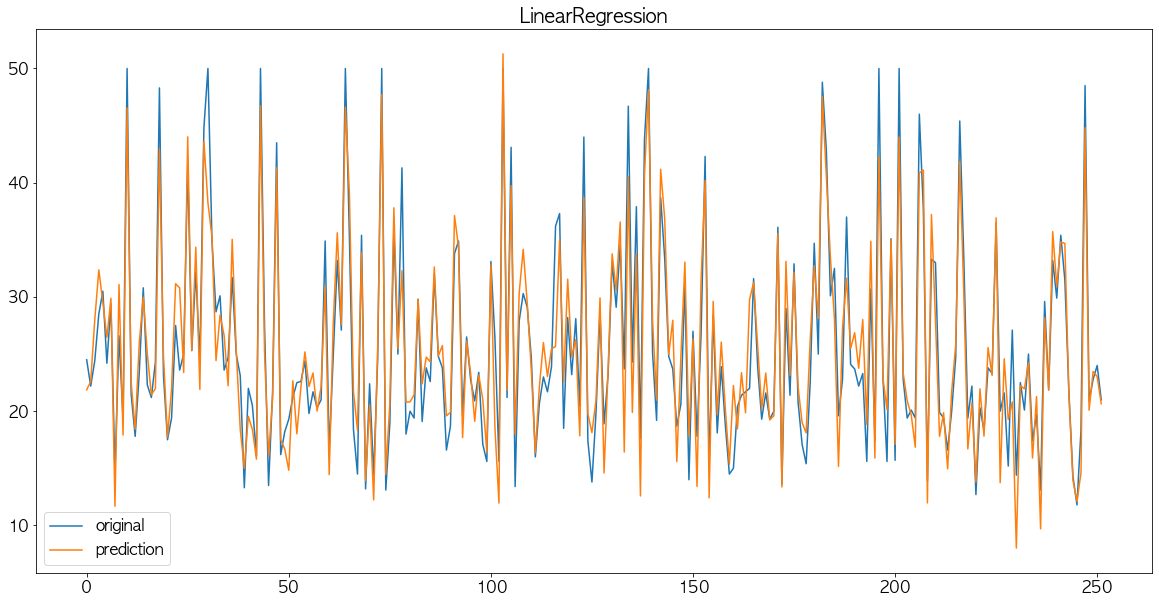

In [26]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

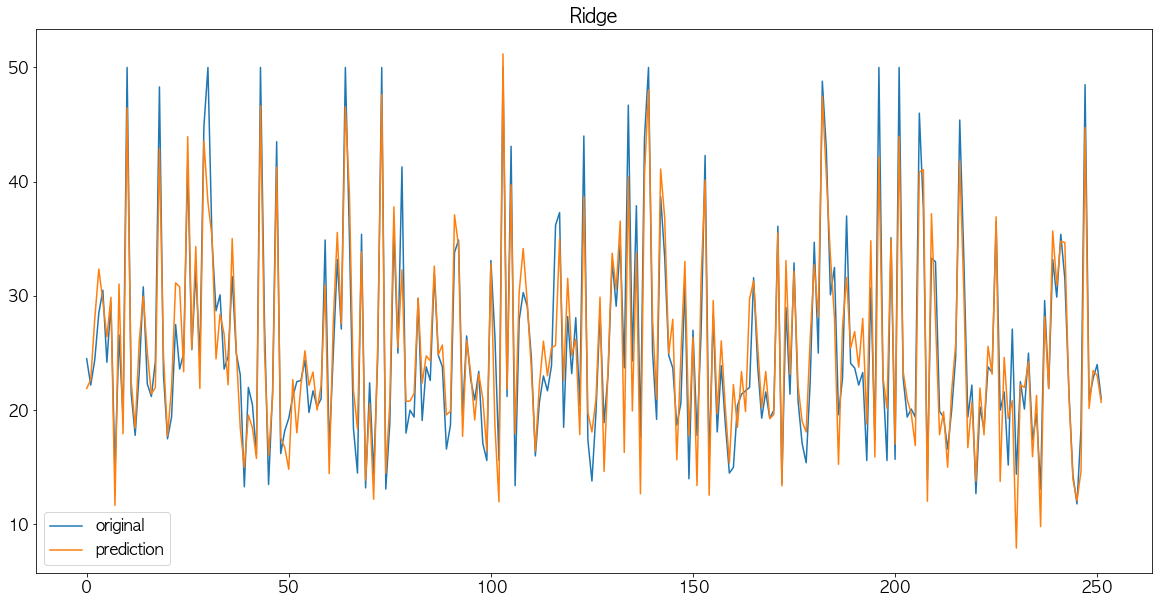

In [27]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

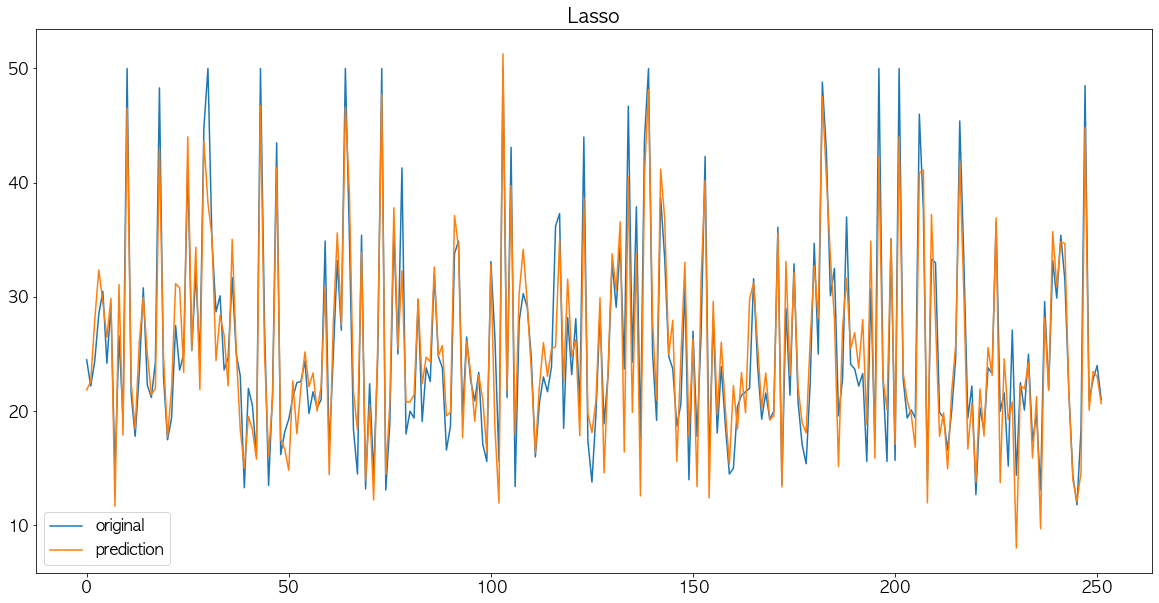

In [28]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

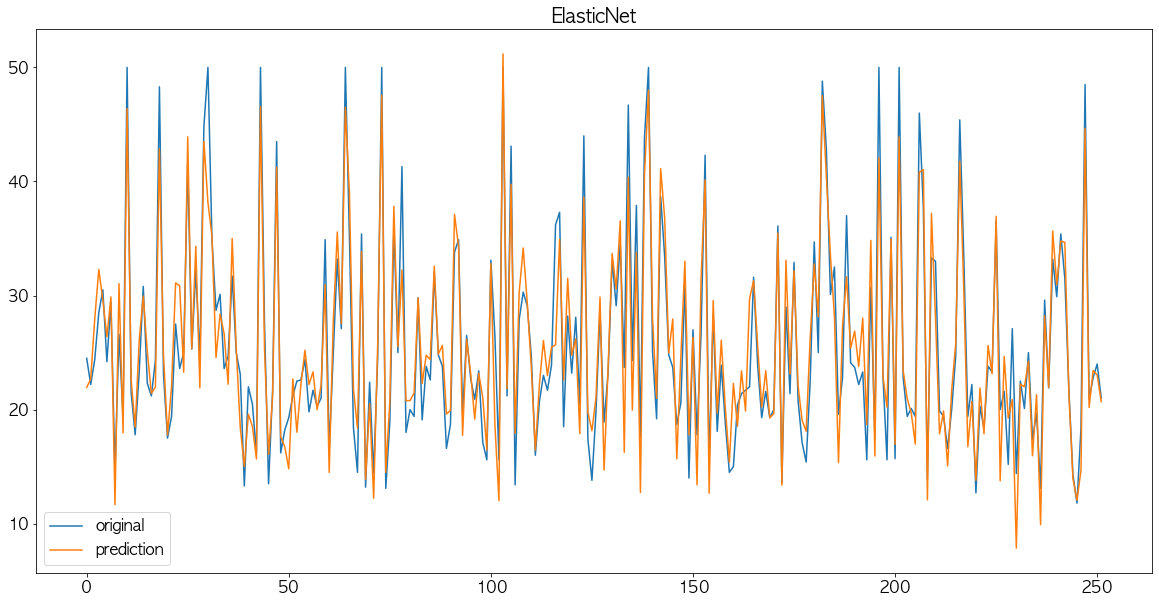

In [29]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

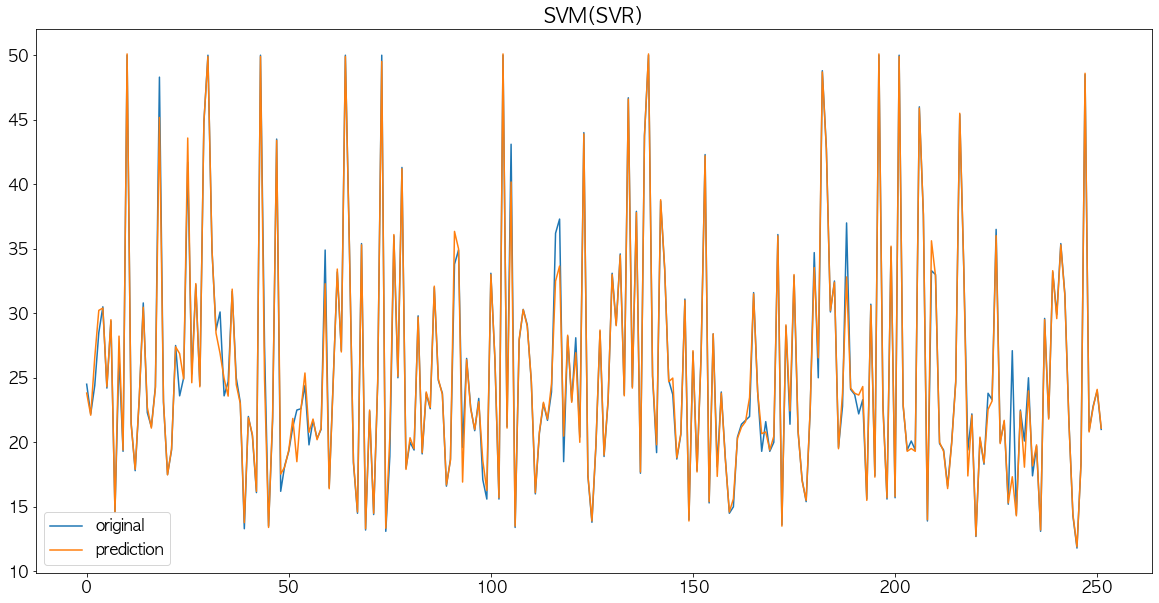

In [30]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('SVM(SVR)')
plt.show()

In [31]:
# 검증용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_test)
y_pred2 = best_model2.predict(X_test)
y_pred3 = best_model3.predict(X_test)
y_pred4 = best_model4.predict(X_test)
y_pred5 = best_model5.predict(X_test)

In [32]:
r1 = r2_score(y_test, y_pred1)
r2 = mean_squared_error(y_test, y_pred1)

print('LinearRegression 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

LinearRegression 학습 데이터 평가
r2 : 0.7820679979037827
mean_squared_error : 8.8969118337908


In [33]:
r1 = r2_score(y_test, y_pred2)
r2 = mean_squared_error(y_test, y_pred2)

print('Ridge 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

Ridge 학습 데이터 평가
r2 : 0.7819577257824429
mean_squared_error : 8.901413611096784


In [34]:
r1 = r2_score(y_test, y_pred3)
r2 = mean_squared_error(y_test, y_pred3)

print('Lasso 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

Lasso 학습 데이터 평가
r2 : 0.782067997903783
mean_squared_error : 8.896911833790787


In [35]:
r1 = r2_score(y_test, y_pred4)
r2 = mean_squared_error(y_test, y_pred4)

print('ElasticNet 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

ElasticNet 학습 데이터 평가
r2 : 0.782206533351955
mean_squared_error : 8.891256227196134


In [36]:
r1 = r2_score(y_test, y_pred5)
r2 = mean_squared_error(y_test, y_pred5)

print('SVM(SVR) 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

SVM(SVR) 학습 데이터 평가
r2 : 0.9052088422116722
mean_squared_error : 3.8697784875732215


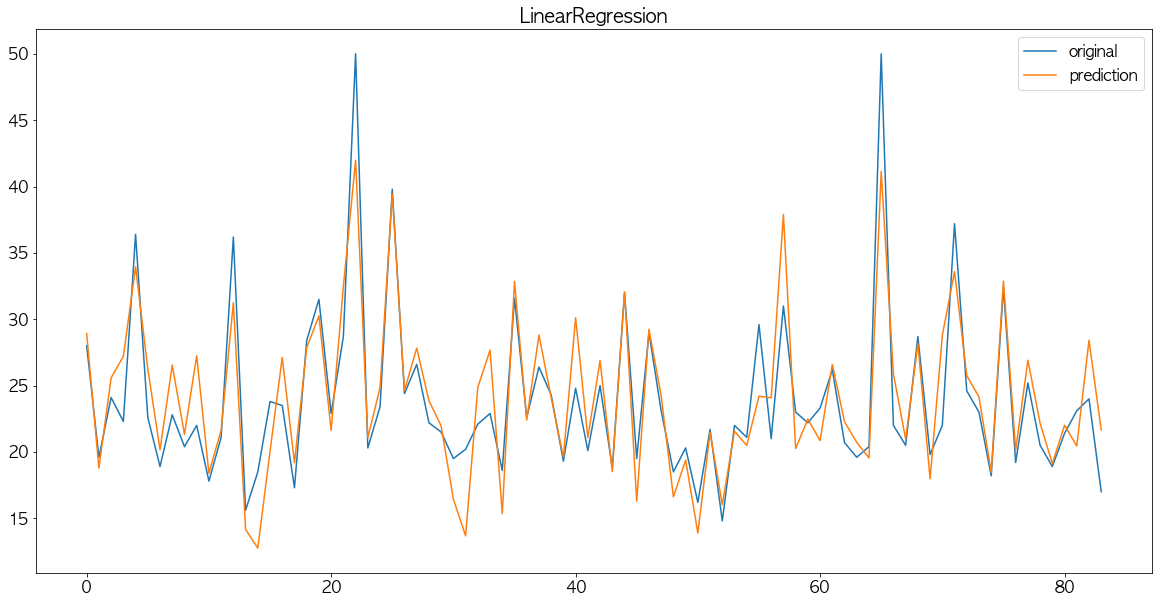

In [37]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

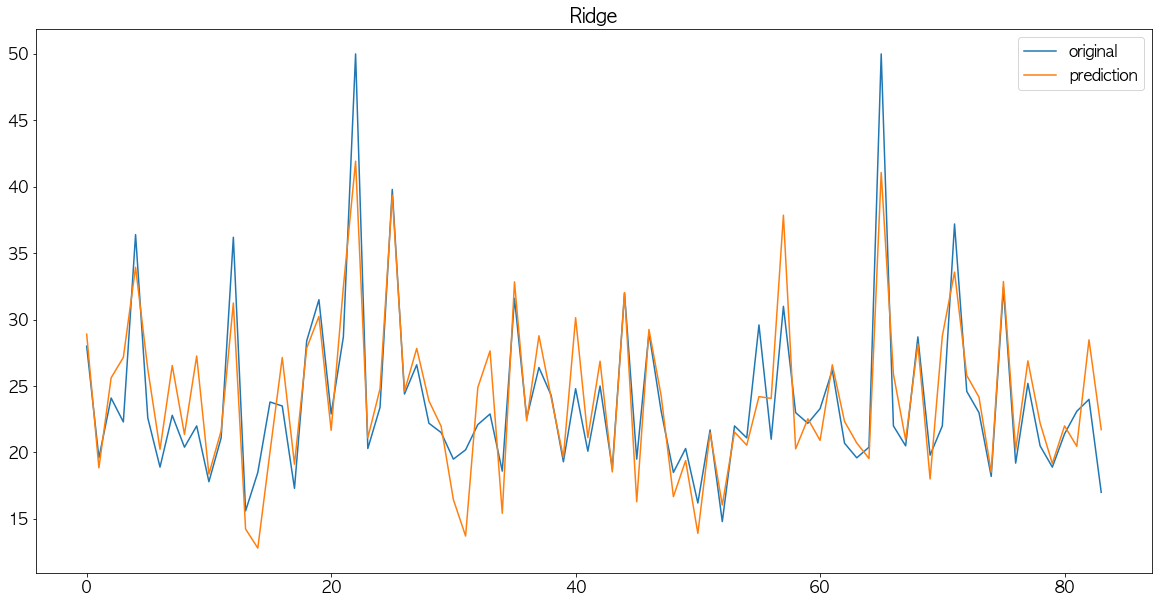

In [38]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

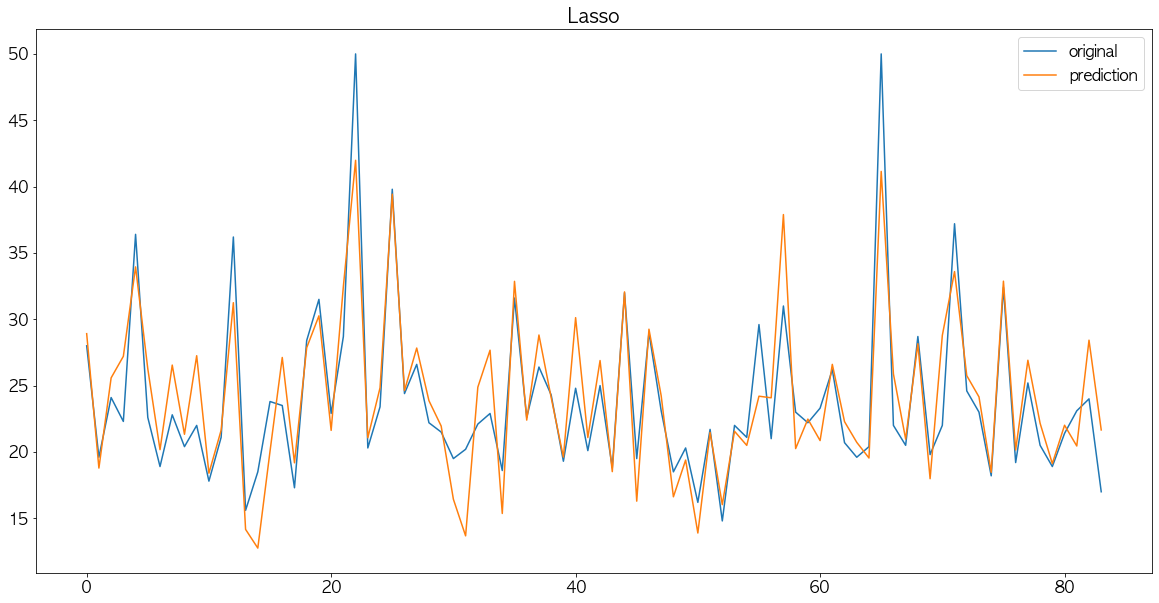

In [39]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

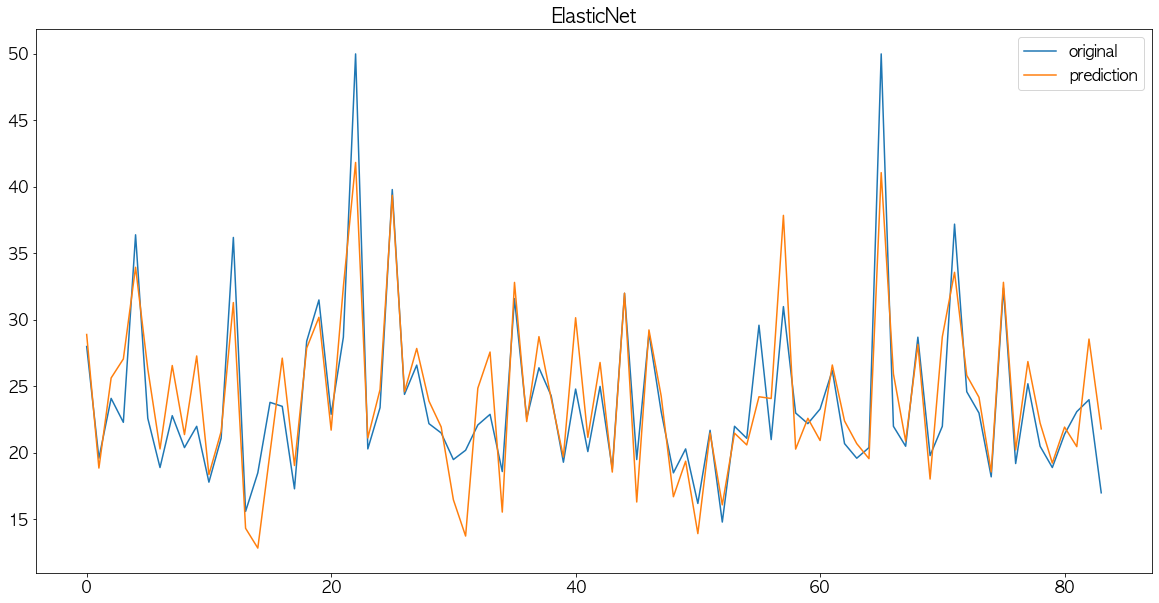

In [40]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

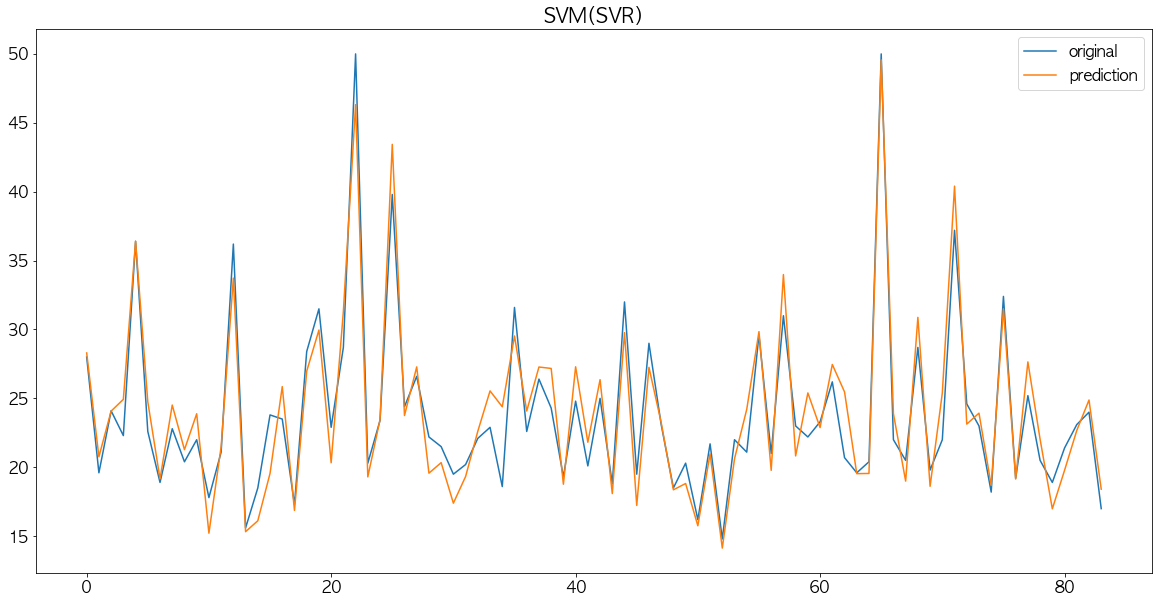

In [41]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('SVM(SVR)')
plt.show()

### 전체 데이터를 학습시킨다.

In [42]:
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)

SVR(C=100)

In [43]:
# 예측할 데이터를 불러온다.
df2 = pd.read_csv('data/boston_new.csv')
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [44]:
# 전처리
X = scaler1.transform(df2)
X

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [45]:
# 예측한다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)

In [46]:
# 저장한다.
df2['target'] = y_pred1
df2.to_csv('data/boston_LR.csv')

df2['target'] = y_pred2
df2.to_csv('data/boston_Ridge.csv')

df2['target'] = y_pred3
df2.to_csv('data/boston_Lasso.csv')

df2['target'] = y_pred4
df2.to_csv('data/boston_ElasticNet.csv')

df2['target'] = y_pred5
df2.to_csv('data/boston_SVM(SVR).csv')